##FINAL PROJECT

#Task 1: Singly Linked List Operations

In [17]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next


class SinglyLinkedList:
    def __init__(self):
        self.head = None

    def append(self, value):
        new_node = ListNode(value)
        if not self.head:
            self.head = new_node
        else:
            current = self.head
            while current.next:
                current = current.next
            current.next = new_node

    def to_list(self):
        result = []
        current = self.head
        while current:
            result.append(current.value)
            current = current.next
        return result

    def print_list(self):
        values = self.to_list()
        print("->".join(map(str, values)))


def reverse_linked_list(head):
    """Reverses a singly linked list by modifying node references."""
    previous = None
    current = head
    while current:
        next_node = current.next
        current.next = previous
        previous = current
        current = next_node
    return previous


def merge_sort_linked_list(head):
    """Sorts a singly linked list using merge sort."""
    if not head or not head.next:
        return head

    def split(head):
        """Splits the list into two halves."""
        slow = head
        fast = head.next
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
        mid = slow.next
        slow.next = None
        return head, mid

    def merge(l1, l2):
        """Merges two sorted lists into one."""
        dummy = ListNode()
        tail = dummy
        while l1 and l2:
            if l1.value < l2.value:
                tail.next = l1
                l1 = l1.next
            else:
                tail.next = l2
                l2 = l2.next
            tail = tail.next
        tail.next = l1 or l2
        return dummy.next

    left, right = split(head)
    left = merge_sort_linked_list(left)
    right = merge_sort_linked_list(right)
    return merge(left, right)


def merge_two_sorted_lists(l1, l2):
    """Merges two sorted linked lists into one."""
    dummy = ListNode()
    tail = dummy
    while l1 and l2:
        if l1.value < l2.value:
            tail.next = l1
            l1 = l1.next
        else:
            tail.next = l2
            l2 = l2.next
        tail = tail.next
    tail.next = l1 or l2
    return dummy.next


# Testing the functions
linked_list = SinglyLinkedList()
for value in [3, 1, 4, 1, 5, 9, 2, 6, 5]:
    linked_list.append(value)

print("Original list:")
linked_list.print_list()

linked_list.head = reverse_linked_list(linked_list.head)
print("Reversed list:")
linked_list.print_list()

linked_list.head = merge_sort_linked_list(linked_list.head)
print("Sorted list:")
linked_list.print_list()

list1 = SinglyLinkedList()
list2 = SinglyLinkedList()
for value in [1, 3, 5, 7]:
    list1.append(value)
for value in [2, 4, 6, 8]:
    list2.append(value)

print("List 1:")
list1.print_list()
print("List 2:")
list2.print_list()

merged_head = merge_two_sorted_lists(list1.head, list2.head)
merged_list = SinglyLinkedList()
merged_list.head = merged_head
print("Merged list:")
merged_list.print_list()


Original list:
3->1->4->1->5->9->2->6->5
Reversed list:
5->6->2->9->5->1->4->1->3
Sorted list:
1->1->2->3->4->5->5->6->9
List 1:
1->3->5->7
List 2:
2->4->6->8
Merged list:
1->2->3->4->5->6->7->8


#Task 2: Pythagorean Tree Fractal

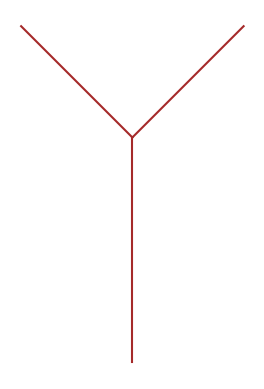

In [18]:
import matplotlib.pyplot as plt
import math


def draw_tree(ax, x, y, length, angle, level):
    """Recursively draws the Pythagorean tree fractal."""
    if level == 0:
        return

    x_new = x + length * math.cos(math.radians(angle)) 
    y_new = y + length * math.sin(math.radians(angle))

    ax.plot([x, x_new], [y, y_new], color='brown')

    # Calculate new lengths and angles for the branches
    new_length = length * 0.7  # Branches are 70% the length of the parent
    left_angle = angle + 45    # Left branch is angled 45 degrees from the parent
    right_angle = angle - 45   # Right branch is angled -45 degrees from the parent

    # Recursively draw the left and right branches
    draw_tree(ax, x_new, y_new, new_length, left_angle, level - 1)
    draw_tree(ax, x_new, y_new, new_length, right_angle, level - 1)


def main():
    while True:
        try:
            recursion_level = int(input("Enter the recursion level: "))
            if recursion_level >= 0:  # Ensure the level is non-negative
                break
            else:
                print("Please enter a non-negative integer.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')

    initial_length = 100
    initial_angle = 90

    draw_tree(ax, 0, 0, initial_length, initial_angle, recursion_level)

    plt.show()


if __name__ == "__main__":
    main()


#Task 3: Dijkstra's Algorithm

In [19]:
import heapq

def dijkstra(graph, start):
    """Finds the shortest paths from a starting node in a weighted graph."""
    if start not in graph:
        raise ValueError("Starting node not found in the graph.")

    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0

    priority_queue = [(0, start)]
    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # If we've already found a shorter path, skip this one
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances


# Example graph
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# Run Dijkstra's algorithm
start_vertex = 'A'
shortest_paths = dijkstra(graph, start_vertex)
print(f"Shortest paths from {start_vertex}: {shortest_paths}")


Shortest paths from A: {'A': 0, 'B': 1, 'C': 3, 'D': 4}


#Task 4: Visualization of Binary Heap

Visualizing the heap:


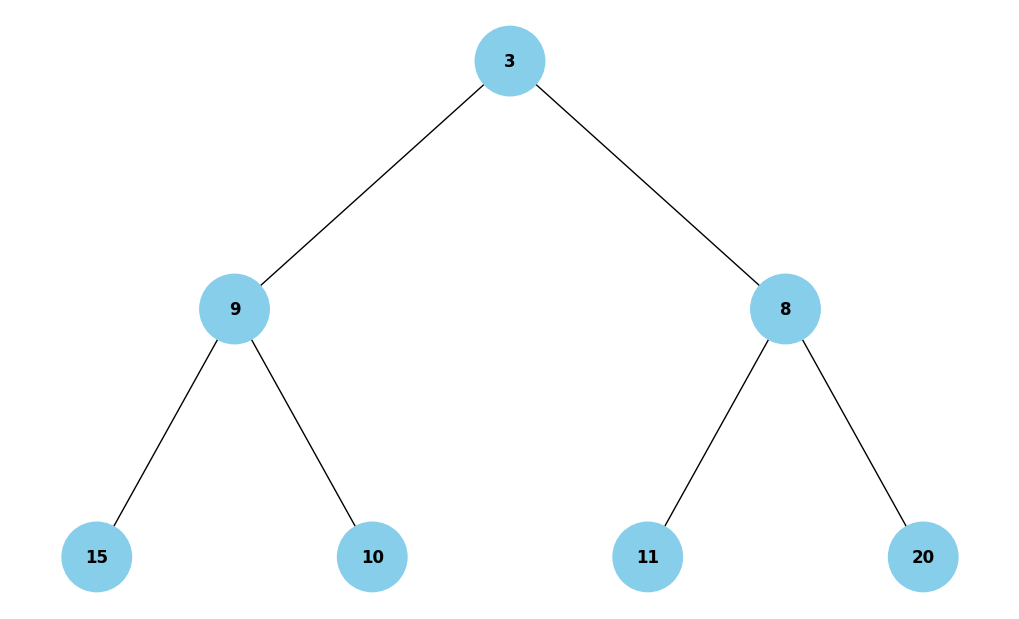

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.val, color=node.color)
        if node.left:
            graph.add_edge(node.val, node.left.val)
            l_x = x - 1 / 2 ** layer
            pos[node.left.val] = (l_x, y - 1)
            add_edges(graph, node.left, pos, x=l_x, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.val, node.right.val)
            r_x = x + 1 / 2 ** layer
            pos[node.right.val] = (r_x, y - 1)
            add_edges(graph, node.right, pos, x=r_x, y=y - 1, layer=layer + 1)
    return graph

def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.val: (0, 0)}
    add_edges(tree, tree_root, pos)

    colors = [node[1]['color'] for node in tree.nodes(data=True)]

    plt.figure(figsize=(10, 6))
    nx.draw(
        tree, pos=pos, with_labels=True, arrows=False, node_size=2500, node_color=colors, 
        font_size=12, font_weight='bold'
    )
    plt.show()

def heap_to_tree(heap):
    """Converts a binary heap (list) into a binary tree for visualization."""
    if not heap:
        return None

    nodes = [Node(val) for val in heap]

    for i in range(len(nodes)):
        left_index = 2 * i + 1
        right_index = 2 * i + 2

        if left_index < len(nodes):
            nodes[i].left = nodes[left_index]
        if right_index < len(nodes):
            nodes[i].right = nodes[right_index]

    return nodes[0]

def visualize_heap(heap):
    """Visualizes a binary heap as a tree."""
    root = heap_to_tree(heap)
    draw_tree(root)


# Example heap
heap = [3, 9, 8, 15, 10, 11, 20]
print("Visualizing the heap:")
visualize_heap(heap)


#Task 5: Visualization of Binary Tree Traversal


DFS Traversal:


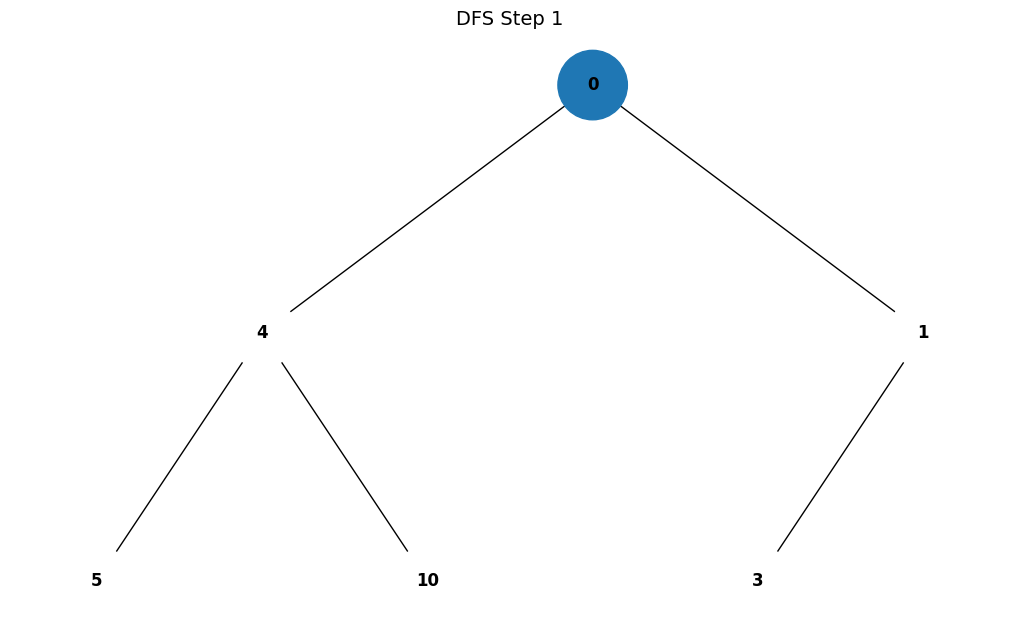

DFS Step 1: Visiting node 0


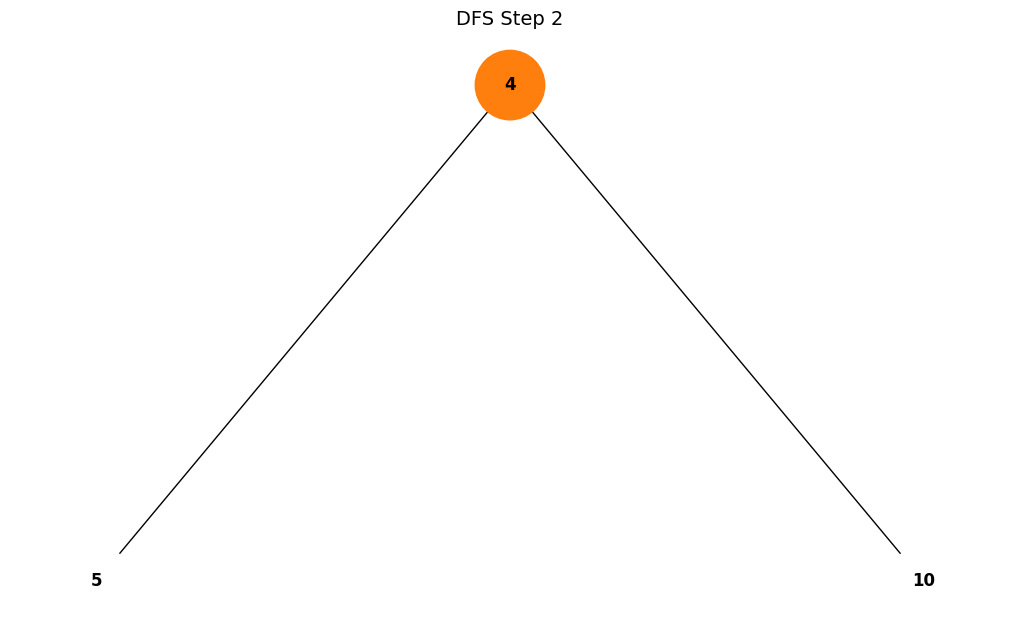

DFS Step 2: Visiting node 4


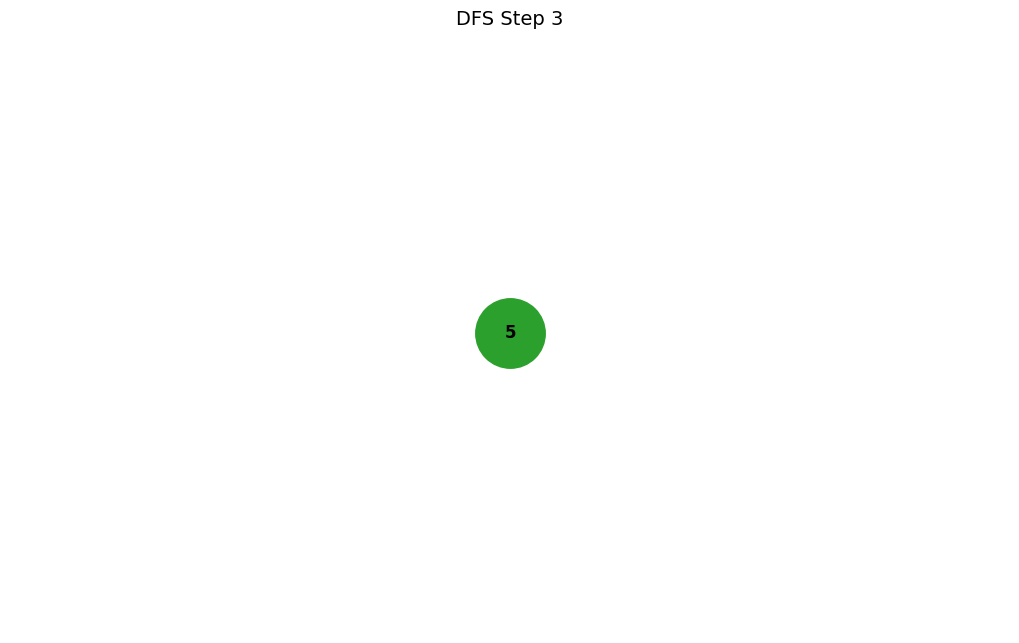

DFS Step 3: Visiting node 5


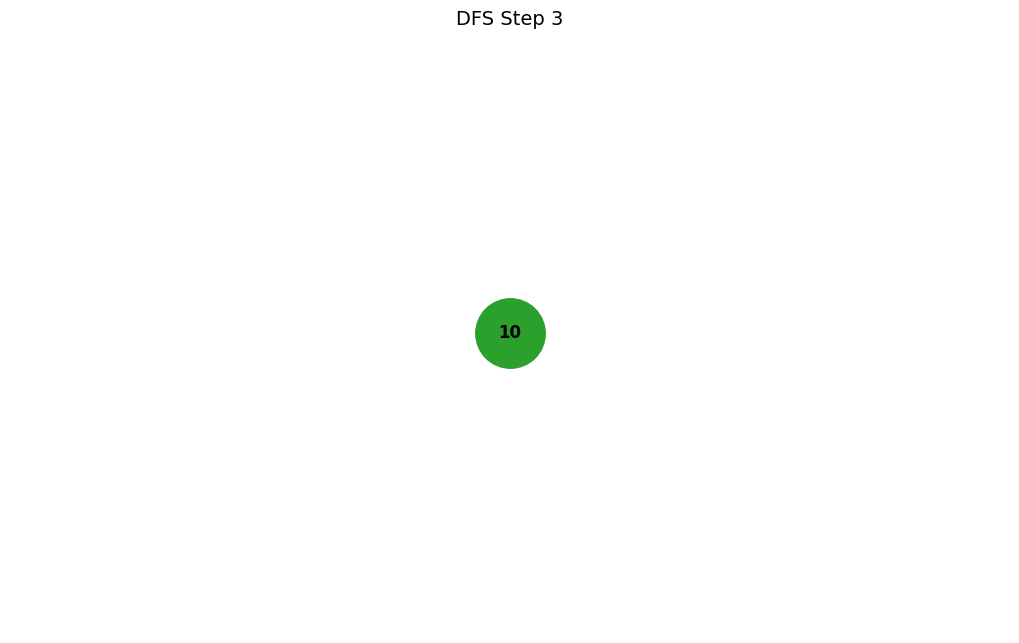

DFS Step 3: Visiting node 10


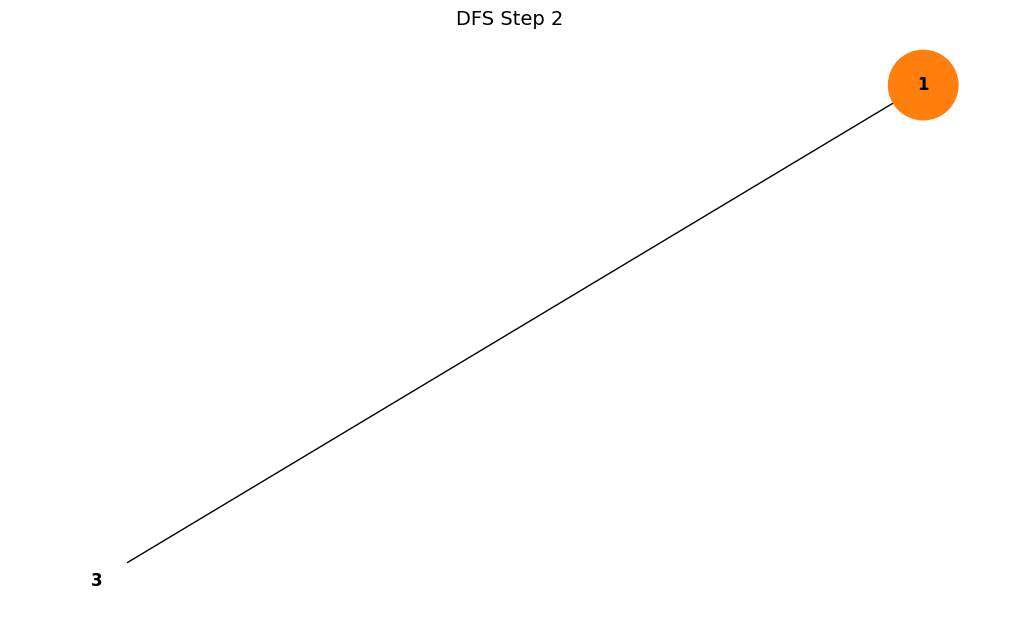

DFS Step 2: Visiting node 1


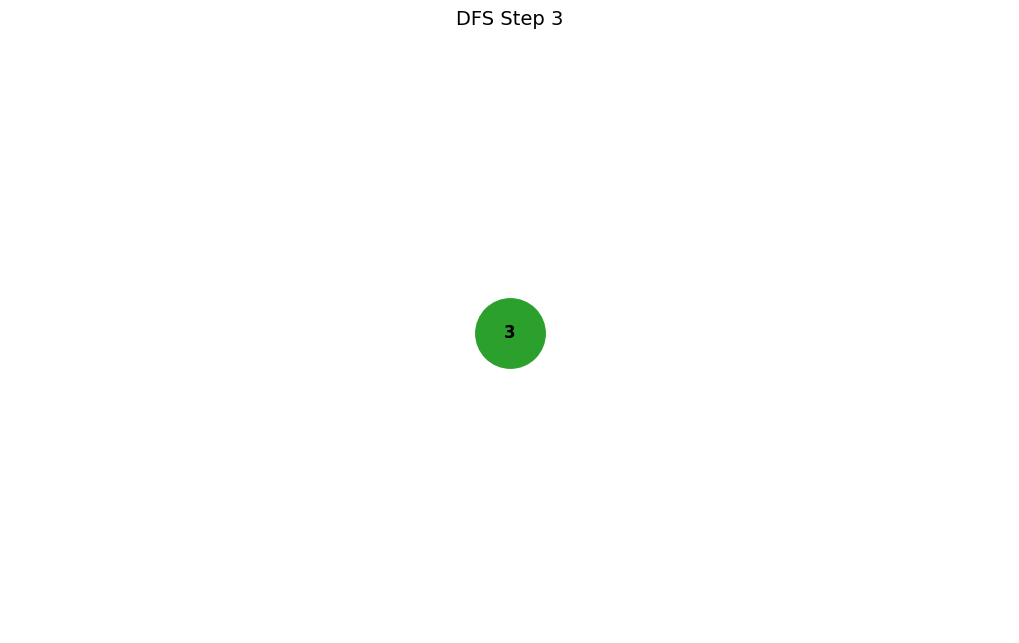

DFS Step 3: Visiting node 3

BFS Traversal:


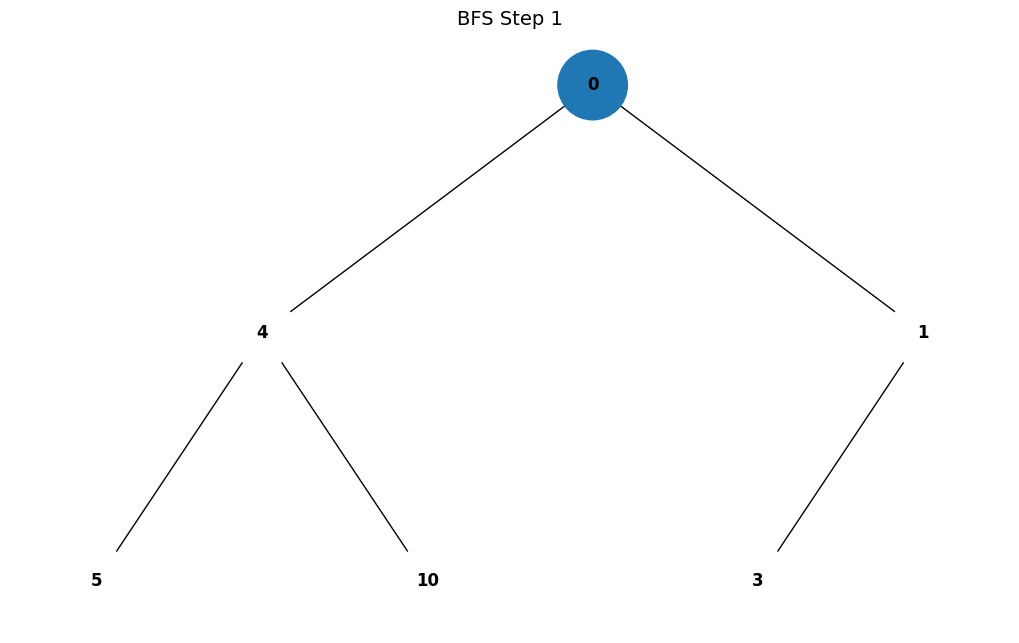

BFS Step 1: Visiting node 0


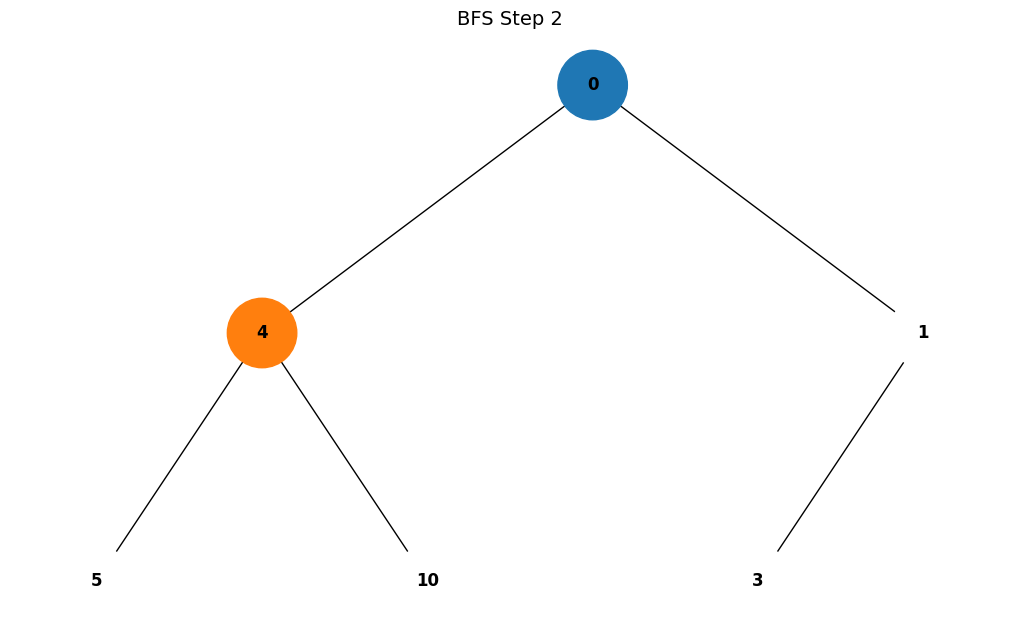

BFS Step 2: Visiting node 4


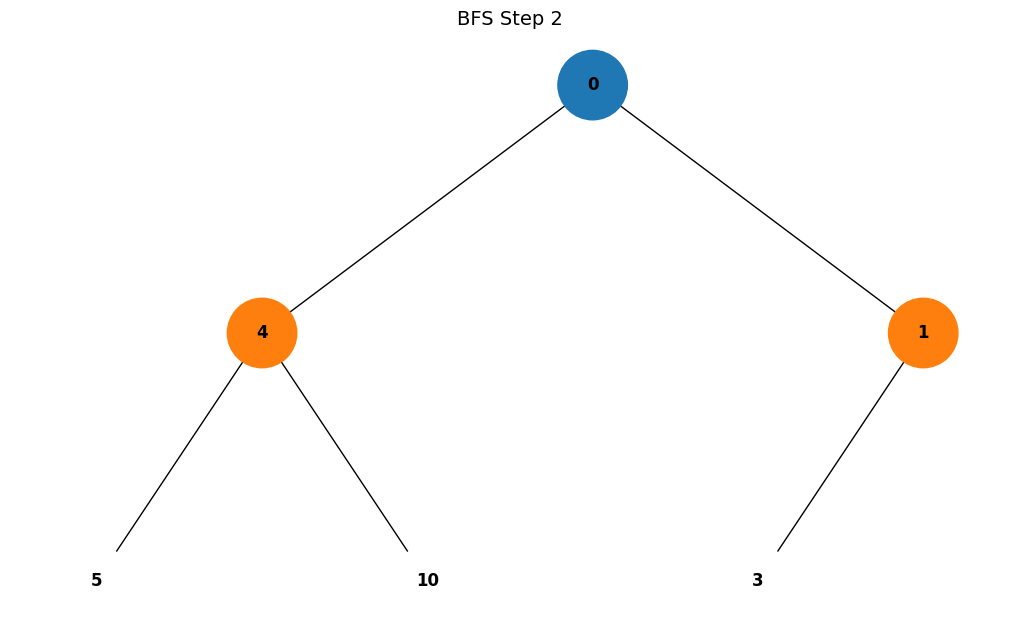

BFS Step 2: Visiting node 1


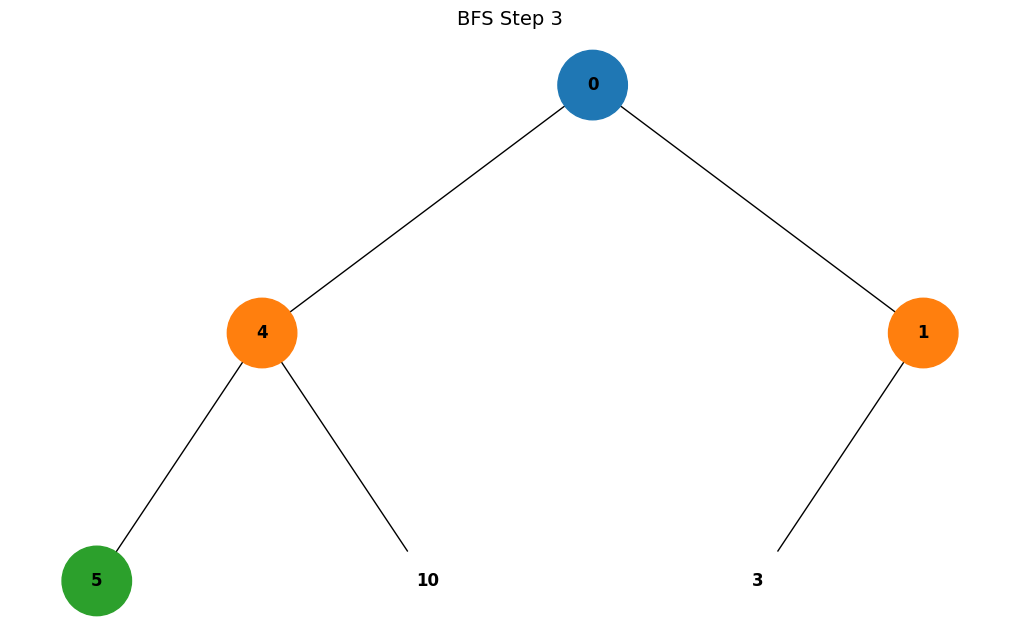

BFS Step 3: Visiting node 5


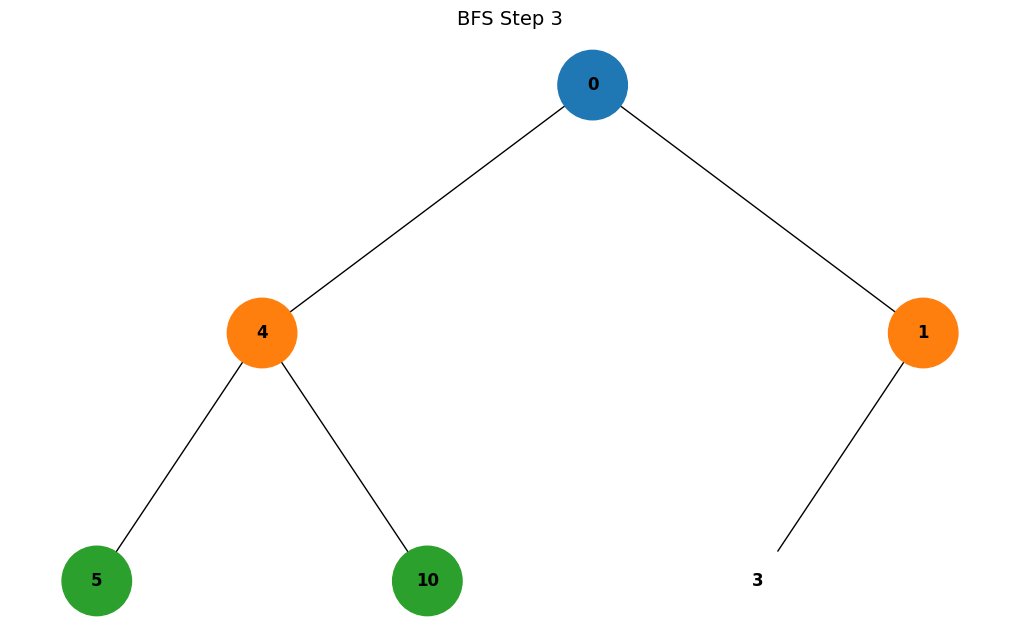

BFS Step 3: Visiting node 10


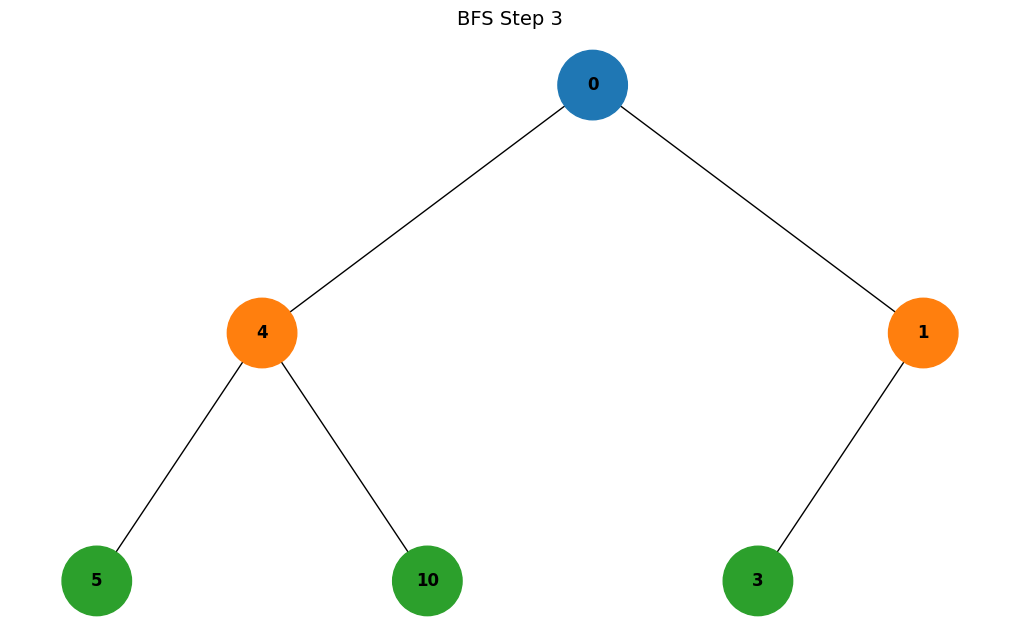

BFS Step 3: Visiting node 3


In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class Node:
    def __init__(self, key, color="#FFFFFF"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.val, color=node.color)
        if node.left:
            graph.add_edge(node.val, node.left.val)
            l_x = x - 1 / 2 ** layer
            pos[node.left.val] = (l_x, y - 1)
            add_edges(graph, node.left, pos, x=l_x, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.val, node.right.val)
            r_x = x + 1 / 2 ** layer
            pos[node.right.val] = (r_x, y - 1)
            add_edges(graph, node.right, pos, x=r_x, y=y - 1, layer=layer + 1)
    return graph

def draw_tree(tree_root, node_colors, title=""):
    """Draws the binary tree with specified node colors and title."""
    tree = nx.DiGraph()
    pos = {tree_root.val: (0, 0)}
    add_edges(tree, tree_root, pos)

    colors = [node_colors[node] for node in tree.nodes()]

    plt.figure(figsize=(10, 6))
    nx.draw(
        tree, pos=pos, with_labels=True, arrows=False, node_size=2500, node_color=colors, 
        font_size=12, font_weight='bold'
    )
    plt.title(title, fontsize=14)  # Add title for visualization clarity
    plt.show()

def generate_color_palette(num_colors):
    """Generates a list of colors from the TABLEAU colormap."""
    return list(mcolors.TABLEAU_COLORS.values())[:num_colors]

def dfs(root, node_colors, color_palette, step=0):
    """Visualizes Depth-First Search (DFS) traversal."""
    if root:
        node_colors[root.val] = color_palette[step]
        draw_tree(root, node_colors, f"DFS Step {step + 1}")  # Draw the tree at each step with a title
        print(f"DFS Step {step + 1}: Visiting node {root.val}")
        dfs(root.left, node_colors, color_palette, step + 1)  # Left subtree
        dfs(root.right, node_colors, color_palette, step + 1) # Right subtree

def bfs(root, node_colors, color_palette):
    """Visualizes Breadth-First Search (BFS) traversal."""
    queue = [(root, 0)]  # Queue to store nodes and their step
    while queue:
        node, step = queue.pop(0)
        node_colors[node.val] = color_palette[step]
        draw_tree(root, node_colors, f"BFS Step {step + 1}")  # Draw the tree at each step with a title
        print(f"BFS Step {step + 1}: Visiting node {node.val}")
        if node.left:
            queue.append((node.left, step + 1))
        if node.right:
            queue.append((node.right, step + 1))

# Creating a sample tree
root = Node(0)
root.left = Node(4)
root.left.left = Node(5)
root.left.right = Node(10)
root.right = Node(1)
root.right.left = Node(3)

# Initialize node colors and color palette
num_nodes = 6
color_palette = generate_color_palette(num_nodes)
node_colors = {node.val: "#FFFFFF" for node in [root, root.left, root.left.left, root.left.right, root.right, root.right.left]}


print("\nDFS Traversal:")
dfs(root, node_colors.copy(), color_palette.copy())  # Pass copies for each traversal

print("\nBFS Traversal:")
bfs(root, node_colors.copy(), color_palette.copy())


#Task 6: Greedy Algorithm and Dynamic Programming for Food Selection

In [22]:
def greedy_algorithm(items, budget):
    """
    Selects food items using a greedy algorithm to maximize calories within a budget.

    Args:
        items: A dictionary where keys are food names and values are dictionaries containing 'cost' and 'calories'.
        budget: The maximum budget for food selection.

    Returns:
        A list of selected food items.

    Raises:
        ValueError: If budget is negative or item data is invalid.
    """
    
    # Error handling
    if budget < 0:
        raise ValueError("Budget must be non-negative.")
    
    for name, info in items.items():
        if "cost" not in info or "calories" not in info:
            raise ValueError(f"Invalid item data for '{name}': missing cost or calories.")
    
    # Calculate calorie-to-cost ratios
    item_ratios = [(name, info['calories'] / info['cost']) for name, info in items.items()]
    
    # Sort items by ratio in descending order
    item_ratios.sort(key=lambda x: x[1], reverse=True)

    total_cost = 0
    selected_items = []

    # Greedily select items with the highest ratio while staying within budget
    for name, ratio in item_ratios:
        cost = items[name]['cost']
        if total_cost + cost <= budget:
            selected_items.append(name)
            total_cost += cost

    return selected_items


def dynamic_programming(items, budget):
    """
    Finds the optimal food selection to maximize calories within a budget using dynamic programming.

    Args:
        items: A dictionary where keys are food names and values are dictionaries containing 'cost' and 'calories'.
        budget: The maximum budget for food selection.

    Returns:
        A list of selected food items.

    Raises:
        ValueError: If budget is negative or item data is invalid.
    """
    
    # Error handling
    if budget < 0:
        raise ValueError("Budget must be non-negative.")
    
    for name, info in items.items():
        if "cost" not in info or "calories" not in info:
            raise ValueError(f"Invalid item data for '{name}': missing cost or calories.")
    
    # Setup DP table
    item_names = list(items.keys())
    num_items = len(item_names)
    dp = [[0] * (budget + 1) for _ in range(num_items + 1)]

    # Fill the DP table
    for i in range(1, num_items + 1):
        for b in range(budget + 1):
            item_name = item_names[i - 1]
            item_cost = items[item_name]['cost']
            item_calories = items[item_name]['calories']

            if item_cost <= b:
                dp[i][b] = max(dp[i - 1][b], dp[i - 1][b - item_cost] + item_calories)
            else:
                dp[i][b] = dp[i - 1][b]

    # Trace back to find the selected items
    selected_items = []
    b = budget
    for i in range(num_items, 0, -1):
        if dp[i][b] != dp[i - 1][b]:
            item_name = item_names[i - 1]
            selected_items.append(item_name)
            b -= items[item_name]['cost']

    return selected_items


# Example Usage
items = {
    "pizza": {"cost": 50, "calories": 300},
    "hamburger": {"cost": 40, "calories": 250},
    "hot-dog": {"cost": 30, "calories": 200},
    "pepsi": {"cost": 10, "calories": 100},
    "cola": {"cost": 15, "calories": 220},
    "potato": {"cost": 25, "calories": 350}
}
budget = 100

greedy_selection = greedy_algorithm(items, budget)
dp_selection = dynamic_programming(items, budget)

print("Greedy Algorithm Selection:", greedy_selection)
print("Dynamic Programming Selection:", dp_selection)


Greedy Algorithm Selection: ['cola', 'potato', 'pepsi', 'hot-dog']
Dynamic Programming Selection: ['potato', 'cola', 'pepsi', 'pizza']


#Task 7: Monte Carlo Simulation of Dice Throws

    Sum  Simulated Probability  Theoretical Probability
0     2               0.027538                 0.027778
1     3               0.055610                 0.055556
2     4               0.083285                 0.083333
3     5               0.111160                 0.111111
4     6               0.139655                 0.138889
5     7               0.166685                 0.166667
6     8               0.138229                 0.138889
7     9               0.110934                 0.111111
8    10               0.083782                 0.083333
9    11               0.055277                 0.055556
10   12               0.027845                 0.027778


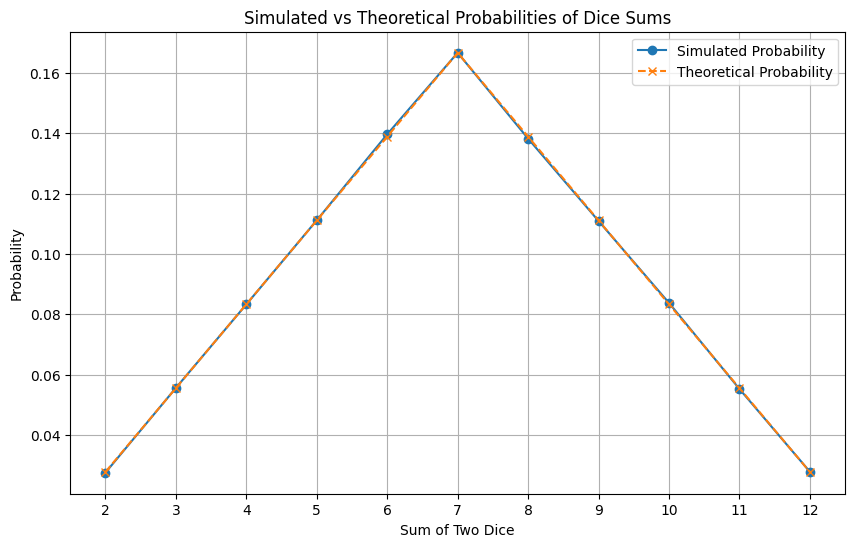

In [23]:
import random
import matplotlib.pyplot as plt
import pandas as pd

# Number of simulations (dice throws)
num_throws = 1000000

# Simulate dice throws and count the sums
sums = [0] * 13  # Index from 0 to 12, but we'll use 2 to 12

for _ in range(num_throws):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    dice_sum = die1 + die2
    sums[dice_sum] += 1

# Calculate probabilities
probabilities = [s / num_throws for s in sums]

# Theoretical probabilities (known for two dice)
theoretical_probs = {
    2: 1/36,
    3: 2/36,
    4: 3/36,
    5: 4/36,
    6: 5/36,
    7: 6/36,
    8: 5/36,
    9: 4/36,
    10: 3/36,
    11: 2/36,
    12: 1/36
}

# Create a DataFrame for better visualization
data = {
    'Sum': list(range(2, 13)),
    'Simulated Probability': [probabilities[i] for i in range(2, 13)],
    'Theoretical Probability': [theoretical_probs[i] for i in range(2, 13)]
}
df = pd.DataFrame(data)

# Display the results in a table
print(df)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df['Sum'], df['Simulated Probability'], marker='o', linestyle='-', label='Simulated Probability')
plt.plot(df['Sum'], df['Theoretical Probability'], marker='x', linestyle='--', label='Theoretical Probability')
plt.xlabel('Sum of Two Dice')
plt.ylabel('Probability')
plt.title('Simulated vs Theoretical Probabilities of Dice Sums')
plt.legend()
plt.xticks(df['Sum'])  # Show all possible sums on the x-axis
plt.grid(True)
plt.show()

# Save the results and analysis in a README.md file
with open("README.md", "w") as f:
    f.write("# Monte Carlo Simulation of Dice Throws\n\n")
    f.write("## Simulated Probabilities vs Theoretical Probabilities\n\n")
    f.write(df.to_markdown(index=False, numalign="left", stralign="left"))  # Use numalign and stralign for better table format
    f.write("\n\n## Conclusion\n\n")
    f.write("The Monte Carlo simulation closely matches the theoretical probabilities of rolling two dice. The minor discrepancies are due to the random nature of the simulation and the finite number of throws. Increasing the number of throws would further reduce these discrepancies, as the Law of Large Numbers dictates that the simulated probabilities should converge to the theoretical values with more trials.\n")
